In [26]:
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
import pandas as pd

In [27]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [28]:
model = keras.models.load_model('model/pose_classification_model.h5')

In [29]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 132)]             0         
                                                                 
 dense_20 (Dense)            (None, 512)               68096     
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dense_23 (Dense)            (None, 256)               65792     
                                                                 
 dense_24 (Dense)            (None, 3)                 771       
                                                                 
Total params: 528,643
Trainable params: 528,643
Non-trainab

In [30]:
class_names = ['standing', 't-pose', 'x-pose']
def predictFromLandMark(landmarkList):
    temp = np.zeros(132)
    for i in range(len(landmarkList)):
        # df[str(4*i)] = [landmarkList[i].x]
        # df[str(4*i + 1)] = [landmarkList[i].y]
        # df[str(4*i + 2)] = [landmarkList[i].z]
        # df[str(4*i + 3)] = [landmarkList[i].visibility]
        temp[4*i] = landmarkList[i].x
        temp[4*i + 1] = landmarkList[i].x
        temp[4*i + 2] = landmarkList[i].y
        temp[4*i + 3] = landmarkList[i].visibility
    df = pd.DataFrame([temp], columns=np.arange(132))
    return class_names[np.argmax(model.predict(df), axis=1)[0]]

t-pose


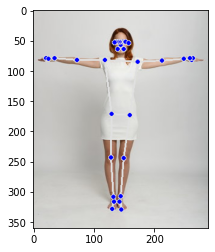

In [31]:
test_img = cv2.cvtColor(cv2.imread('test/test1.jpg'),cv2.COLOR_BGR2RGB)
results = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5).process(test_img)
print(predictFromLandMark(results.pose_landmarks.landmark))
mp_drawing.draw_landmarks(test_img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
plt.imshow(test_img)
plt.show()


In [32]:
def predictFromVideo(video_name, isWebCam=False):
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (10,50)
    fontScale              = 0.5
    fontColor              = (255,0,0)
    thickness              = 1
    lineType               = 2

    if (isWebCam):
        cap = cv2.VideoCapture(0)
    else:
        cap = cv2.VideoCapture(video_name)
    
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # image.flags.writeable = False

            results = pose.process(image)

            # image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            resized_img = cv2.resize(image, (394, 700))
            
            if results.pose_landmarks is None:
                classified_pose_name = "Calculating!!"
            else:
                classified_pose_name = predictFromLandMark(results.pose_landmarks.landmark)
            # display(resized_img)
            cv2.putText(resized_img, "Predict result: " + classified_pose_name, 
                bottomLeftCornerOfText, 
                font, 
                fontScale,
                fontColor,
                thickness,
                lineType)
            cv2.imshow("show pose predict",resized_img)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
            
    cap.release()
    # out.release()
    cv2.destroyAllWindows()

In [25]:
predictFromVideo('sample/x-pose-sample.mp4')

In [ ]:
predictFromVideo('test/test-video-1.mp4')

In [33]:
#ขาหาย 
predictFromVideo('test/test-video-2.MOV')

In [34]:
#แขนหาย x-pose หาย
predictFromVideo('test/test-video-3.MOV')